# EDA & Data Preprocessing on Google App Store Rating Dataset.

## Domain: Mobile device apps

## Context:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

## Objective:
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.
## Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

### Attribute Information:

|Slno. |Attribute |Description|
|------|:--------:|:----------|
|1| App|Application name|
|2| Category| Category the app belongs to.|
|3| Rating| Overall user rating of the app|
|4| Size| Size of the app|
|5| Installs| Number of user reviews for the app|
|6| Type| Paid or Free|
|7| Price| Price of the app|
|8| Content Rating| Age group the app is targeted at - children/Mature 21+ /Adult|
|9| Genres| An app can belong to multiple genres (apart from its main category). For eg. a musical family game will belong to Music, Game, Family genres.|
|10| Last Updated| Date when the app was last updated on play store.|
|11| Current Ver| Current version of the app available on play store.|
|12| Android Ver| Min required Android Version.|

### 1. Import required libraries and read the dataset.

In [195]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# Reading the required data

data = pd.read_csv('Apps_data+(1).csv')

In [197]:
# checking whether the dataframe is created or not
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [198]:
# display first 5 rows of data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [199]:
# shape of the data
data.shape

(10841, 13)

In [200]:
# informartion about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [201]:
# statistical summary for numerical type columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [202]:
# statistical summary for object type columns
data.describe(include='object').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


#### Columns that need to be worked upon:

**1. Rating:**
- There seems to be an issue with the 'Rating' column, as the maximum value is 19, which is unexpected for an app rating. This column needs investigation and cleaning.

**2. Reviews:**
- The 'Reviews' column needs to be converted to a numeric type.

**3. Installs:**
- The 'Installs' column needs cleaning and conversion to a numeric type.

**4. Price:**
- The 'Price' column needs cleaning and conversion to a numeric type.

**5. Content Rating:**
- The 'Content Rating' column has a few missing values that need to be addressed.

**6. Type:**
- The 'Type' column has one missing value that needs to be addressed.

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [203]:
# To check for duplicated rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [204]:
# counting the number of duplicate rows
data.duplicated().sum()

483

In [205]:
# drop or removing duplicate rows from data
data.drop_duplicates(inplace=True)

In [206]:
# checking the shape of data after removing duplicates
data.shape

(10358, 13)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [207]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [208]:
# category = 1.9 is a invalid catgory
# let's check the data that contains invalid category
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [209]:
# dropping the row of invalid category
data.drop(10472, inplace=True)

In [210]:
# now let's check unique category values
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [211]:
data.shape

(10357, 13)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [212]:
# checking missing values in Rating column
data['Rating'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10357, dtype: bool

In [213]:
# count of total missing values
data['Rating'].isnull().sum()

1465

In [214]:
# dropping the rows in which missing values are present for rating column
data.dropna(subset=['Rating'], inplace=True)

In [215]:
# now let's check the size of data after removing missing values
data.shape

(8892, 13)

In [216]:
# let's create a new column called Rating_category
data['Rating_category'] = data['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')

In [217]:
# checking whether new column is added or not
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution. 

In [218]:
# checking unique values and their total count
data['Rating_category'].value_counts()

Rating_category
High    8012
Low      880
Name: count, dtype: int64

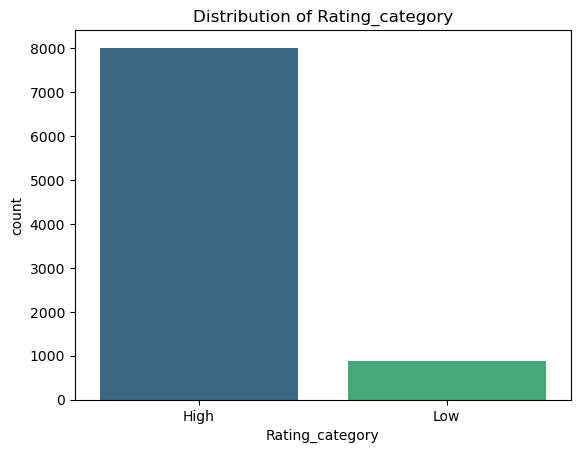

In [219]:
sns.countplot(x='Rating_category', data=data, palette='viridis')
plt.title('Distribution of Rating_category')
plt.show()

#### Comment:
- The distribution of the '**Rating_category**' indicates that a 8012 number of apps fall into the **High category**, suggesting that a large proportion of apps have ratings greater than **3.5**. This implies that a considerable portion of the apps in the dataset is well-received by users. 
- However, the 880 of apps in the **Low category** also provides insights into the presence of apps with lower ratings, albeit in a potentially smaller proportion.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [220]:
# converting reviews to int type
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [221]:
data.dtypes['Reviews']

dtype('int64')

In [222]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


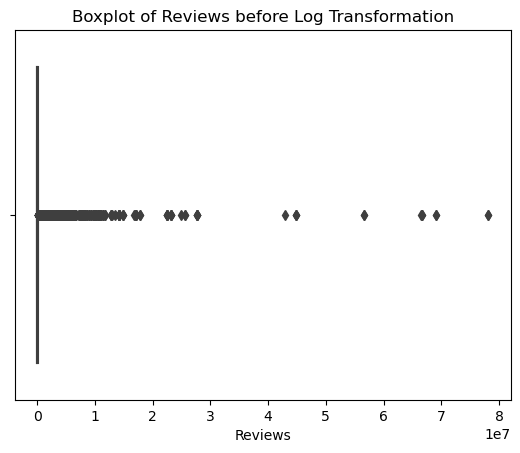

In [223]:
# box plot of data before log transformation
sns.boxplot(x=data['Reviews'])
plt.title("Boxplot of Reviews before Log Transformation")
plt.show()

#### Inferences:
- From the above plot we cannot exactly say what is 5 point summary for this data.
- Also there are lot more outliers values which will affect the data for visualizing
- To overcome this we will be using log transformation for particularly Reviews column.

In [224]:
# Applying log transformation to entire Reviews column
data['Reviews'] = np.log10(data['Reviews'])

In [225]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


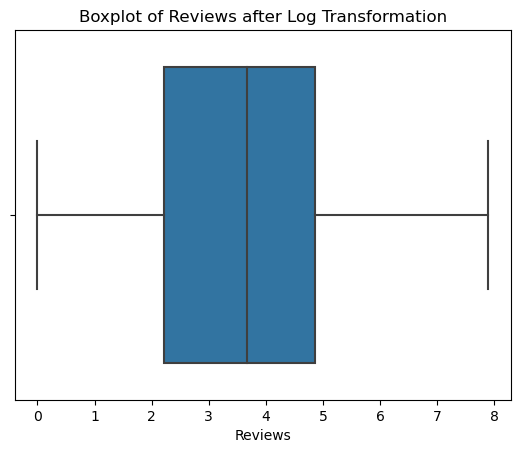

In [226]:
# box plot of data after log transformation
sns.boxplot(x=data['Reviews'])
plt.title("Boxplot of Reviews after Log Transformation")
plt.show()

#### inferences:
- The log transformation has been applied to the 'Reviews' column to handle outliers. The boxplot before and after transformation helps visualize the impact of the log transformation in reducing the influence of extreme values. This transformation is commonly used to mitigate the effect of outliers and achieve a more normalized distribution for skewed data.

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [227]:
data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [230]:
# Replace 'M' with 1 million * value, 'K' with 1 thousand * value
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1000000
    elif 'k' in size:
        return float(size.replace('k', '')) * 1000
    else:
        return size

# Apply the conversion function to the 'Size' column
data['Size'] = data['Size'].apply(convert_size)

In [231]:
data['Size']

0                19000000.0
1                14000000.0
2                 8700000.0
3                25000000.0
4                 2800000.0
                ...        
10834             2600000.0
10836            53000000.0
10837             3600000.0
10839    Varies with device
10840            19000000.0
Name: Size, Length: 8892, dtype: object

In [232]:
# dropping the rows which are having 'varies with device' in size column
data.drop(data[data['Size'] == 'Varies with device'].index, inplace=True)

In [233]:
data.shape

(7424, 14)

In [234]:
data['Size'] = pd.to_numeric(data['Size'])

In [235]:
data.dtypes['Size']

dtype('float64')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [236]:
# Remove unwanted characters from 'Installs' column
data['Installs'] = data['Installs'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [237]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [238]:
# converting installs to num,eric object type from object type
data['Installs'] = pd.to_numeric(data['Installs'])

In [241]:
data['Installs'].dtypes

dtype('int64')

In [242]:
data['Installs'].isnull().sum()

0

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [245]:
data['Price'].head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Price, dtype: object

In [246]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [247]:
# Remove unwanted characters from 'Price' column
data['Price'] = data['Price'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [248]:
data['Price'].unique()

array(['0', '499', '699', '799', '399', '599', '299', '199', '999', '099',
       '900', '549', '1000', '2499', '1199', '7999', '1699', '1499',
       '2999', '1299', '349', '1099', '749', '150', '1999', '1599',
       '3399', '3999', '249', '449', '170', '149', '388', '39999', '1799',
       '40000', '302', '176', '484', '477', '161', '159', '649', '129',
       '29999', '37999', '3799', '1899', '38999', '849', '175', '1400',
       '200', '308', '259', '1940', '1546', '899', '304', '1399', '429',
       '328', '460', '100', '290', '197', '256', '120'], dtype=object)

In [249]:
# Convert 'Price' to numeric data type from object data type
data['Price'] = pd.to_numeric(data['Price'])

In [250]:
data.dtypes['Price']

dtype('int64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [251]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [254]:
# dropping the redundant columns
data.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [255]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000.0,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000.0,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,4.942058,8700000.0,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000.0,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,2.985426,2800000.0,100000,Free,0,Everyone,High


In [256]:
data.shape

(7424, 8)

### 13. Encode the categorical columns.

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int64  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   int64  
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 522.0+ KB


In [259]:
data['Category'].nunique()

33

In [260]:
data['Type'].nunique()

2

In [261]:
data['Content Rating'].nunique()

6

In [262]:
data['Rating_category'].nunique()

2

In [263]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['Category', 'Type', 'Content Rating', 'Rating_category']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, data contains the label encoded values for categorical columns

In [264]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000.0,10000,0,0,1,0
1,0,2.985426,14000000.0,500000,0,0,1,0
2,0,4.942058,8700000.0,5000000,0,0,1,0
3,0,5.333737,25000000.0,50000000,0,0,4,0
4,0,2.985426,2800000.0,100000,0,0,1,0
...,...,...,...,...,...,...,...,...
10833,3,1.643453,619000.0,1000,0,0,1,0
10834,11,0.845098,2600000.0,500,0,0,1,0
10836,11,1.579784,53000000.0,5000,0,0,1,0
10837,11,0.602060,3600000.0,100,0,0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [265]:
# Creating variable X with all Independent Variables.
X = data.drop("Rating_category", axis=1)

# Creating variable Y with Dependent Variable.
Y = data[["Rating_category"]]

In [266]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000.0,10000,0,0,1
1,0,2.985426,14000000.0,500000,0,0,1
2,0,4.942058,8700000.0,5000000,0,0,1
3,0,5.333737,25000000.0,50000000,0,0,4
4,0,2.985426,2800000.0,100000,0,0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000.0,1000,0,0,1
10834,11,0.845098,2600000.0,500,0,0,1
10836,11,1.579784,53000000.0,5000,0,0,1
10837,11,0.602060,3600000.0,100,0,0,1


In [267]:
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


### 15. Split the dataset into train and test.

In [268]:
from sklearn.model_selection import train_test_split

# X contains independent features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# This will split the dataset into 70% training and 30% testing
# The random_state parameter ensures reproducibility of the split

In [269]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6799,27,2.198657,26000000.0,50000,0,0,3
428,6,5.280153,11000000.0,10000000,0,0,1
3304,29,4.093001,5300000.0,1000000,0,0,1
5662,28,1.230449,14000000.0,1000,0,0,1
3714,31,4.586925,89000000.0,1000000,0,0,1
...,...,...,...,...,...,...,...
7754,28,1.230449,1500000.0,50,0,0,1
7795,11,3.383815,6700000.0,50000,0,0,4
7988,11,4.214605,13000000.0,500000,0,0,4
1446,16,5.621080,34000000.0,10000000,0,0,1


In [270]:
y_train

,Rating_category
6799,0
428,0
3304,0
5662,1
3714,0
...,...
7754,0
7795,0
7988,0
1446,0


In [271]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1867,14,5.351243,81000000.0,5000000,0,0,4
4414,14,1.903090,7600000.0,10000,0,0,1
116,2,1.869232,2900000.0,10000,0,0,1
7608,11,4.592765,98000000.0,1000000,0,0,1
9463,11,4.687805,68000000.0,5000000,0,0,1
...,...,...,...,...,...,...,...
6666,11,4.879205,30000000.0,5000000,0,0,1
5645,14,4.327686,45000000.0,100000,1,299,4
457,6,5.088473,30000000.0,1000000,0,0,1
4151,29,5.933090,7900000.0,100000000,0,0,1


### 16. Standardize the data, so that the values are within a particular range.

In [272]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and testing sets
scaler = StandardScaler()

In [273]:
scaler.fit_transform(X_train)

array([[ 1.27778756, -0.69494458,  0.13906904, ..., -0.27648688,
        -0.06402002,  1.52304438],
       [-1.30668392,  1.20636415, -0.50074741, ..., -0.27648688,
        -0.06402002, -0.46483269],
       [ 1.5239277 ,  0.47388175, -0.74387767, ..., -0.27648688,
        -0.06402002, -0.46483269],
       ...,
       [-0.69133357,  0.5489126 , -0.41543855, ..., -0.27648688,
        -0.06402002,  2.51698292],
       [-0.07598322,  1.41671907,  0.48030449, ..., -0.27648688,
        -0.06402002, -0.46483269],
       [ 1.03164742, -1.57140869,  0.86419436, ..., -0.27648688,
        -0.06402002, -0.46483269]])

In [278]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [279]:
X_train_scaled

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,1.277788,-0.694945,0.139069,-0.167366,-0.276487,-0.06402,1.523044
1,-1.306684,1.206364,-0.500747,0.045809,-0.276487,-0.06402,-0.464833
2,1.523928,0.473882,-0.743878,-0.147012,-0.276487,-0.06402,-0.464833
3,1.400858,-1.292337,-0.372784,-0.168415,-0.276487,-0.06402,-0.464833
4,1.770068,0.778637,2.826298,-0.147012,-0.276487,-0.06402,-0.464833
...,...,...,...,...,...,...,...
5191,1.400858,-1.292337,-0.905965,-0.168436,-0.276487,-0.06402,-0.464833
5192,-0.691334,0.036308,-0.684161,-0.167366,-0.276487,-0.06402,2.516983
5193,-0.691334,0.548913,-0.415439,-0.157725,-0.276487,-0.06402,2.516983
5194,-0.075983,1.416719,0.480304,0.045809,-0.276487,-0.06402,-0.464833


In [280]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [281]:
X_test_scaled

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,-0.307264,1.290877,2.487825,-0.060231,-0.294668,-0.060758,2.519278
1,-0.307264,-0.833176,-0.647923,-0.170105,-0.294668,-0.060758,-0.459468
2,-1.775805,-0.854032,-0.848713,-0.170105,-0.294668,-0.060758,-0.459468
3,-0.674399,0.823656,3.214088,-0.148306,-0.294668,-0.060758,-0.459468
4,-0.674399,0.882201,1.932447,-0.060231,-0.294668,-0.060758,-0.459468
...,...,...,...,...,...,...,...
2223,-0.674399,1.000102,0.309036,-0.060231,-0.294668,-0.060758,-0.459468
2224,-0.307264,0.660368,0.949856,-0.168123,3.393649,0.115134,2.519278
2225,-1.286291,1.129011,0.309036,-0.148306,-0.294668,-0.060758,-0.459468
2226,1.528411,1.649292,-0.635106,2.031557,-0.294668,-0.060758,-0.459468
